# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/julianlopez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('../../JL.env')

True

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q='Bitcoin', language='en', from_param='2021-08-01', to='2021-08-25')

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q='Ethereum', language='en', from_param='2021-08-01', to='2021-08-25')

In [28]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.174275,0.071950,0.031500,0.896550
std,0.445714,0.065755,0.069386,0.072887
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.202100,0.072000,0.000000,0.903000
75%,0.525925,0.108250,0.011500,0.942000
max,0.718400,0.200000,0.271000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.115780,0.055800,0.026400,0.91775
std,0.388471,0.062553,0.072668,0.08120
min,-0.893400,0.000000,0.000000,0.68800
25%,0.000000,0.000000,0.000000,0.86325
50%,0.113150,0.049000,0.000000,0.92800
75%,0.344025,0.095000,0.000000,1.00000
max,0.695600,0.190000,0.312000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin**

Q: Which coin had the highest compound score?

A: **Bitcoin**

Q. Which coin had the highest positive score?

A: **Bitcoin**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'dollars','money','cryptocurrency'}

In [114]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(clean_text)
    
    # Lemmatize words into root words
    lem_words = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase and remove stop words
    lower_lem = [word.lower() for word in lem_words if word.lower() not in sw.union(sw_addon)]
    output = ' '.join(lower_lem)
    
    return output

In [123]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,wife started little garden urban backyard coul...
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,paypal allow user outside us buy hold sell fir...
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,photo joe raedlegetty images twitter square ce...
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,retailers increasingly accepting physical item...
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,paypal bringing ability buy hold sell cryptocu...


In [124]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,cent wa founded adfree creator network allows ...
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,paypal allow user outside us buy hold sell fir...
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,bell today coinbase reported another period im...
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,paypal bringing ability buy hold sell cryptocu...
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000,representation ethereum virtual currency stand...


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [125]:
from collections import Counter
from nltk import ngrams

In [131]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_tokens = btc_df.tokens.str.cat().split()
btc_ngrams = ngrams(btc_tokens, n=2)
btc_ngrams_df = pd.DataFrame(Counter(btc_ngrams).most_common(10), columns=['N-gram', 'Count'])
btc_ngrams_df

,N-gram,Count
0,"(buy, hold)",3
1,"(hold, sell)",3
2,"(charpaypal, allow)",2
3,"(allow, user)",2
4,"(first, time)",2
5,"(allow, customer)",2
6,"(sell, cryptocurrencies)",2
7,"(charjoe, tidycyber)",2
8,"(tidycyber, reporter)",2
9,"(roughly, million)",2


In [132]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_tokens = eth_df.tokens.str.cat().split()
eth_ngrams = ngrams(eth_tokens, n=2)
eth_ngrams_df = pd.DataFrame(Counter(eth_ngrams).most_common(10), columns=['N-gram', 'Count'])
eth_ngrams_df

,N-gram,Count
0,"(pc, motherboard)",3
1,"(aug, reuters)",3
2,"(bitcoin, ethereum)",3
3,"(buy, hold)",2
4,"(hold, sell)",2
5,"(reached, billion)",2
6,"(ha, come)",2
7,"(monday, poly)",2
8,"(poly, network)",2
9,"(finance, platform)",2


In [135]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [136]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens, 10)

[('bitcoin', 8),
 ('customer', 5),
 ('allow', 4),
 ('hold', 4),
 ('first', 4),
 ('data', 4),
 ('reuters', 4),
 ('charpaypal', 3),
 ('buy', 3),
 ('sell', 3)]

In [137]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_tokens, 10)

[('ethereum', 11),
 ('ha', 6),
 ('bitcoin', 6),
 ('network', 5),
 ('reuters', 5),
 ('ether', 5),
 ('crypto', 4),
 ('wa', 3),
 ('us', 3),
 ('cryptocurrencies', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

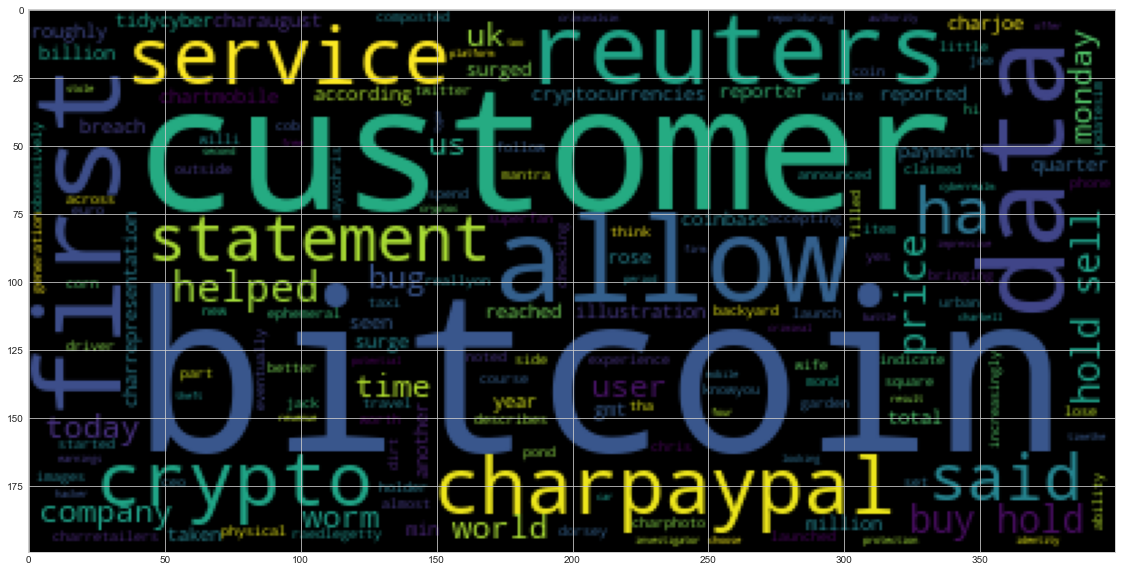

In [142]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(btc_df.tokens.str.cat())
plt.imshow(btc_wc)

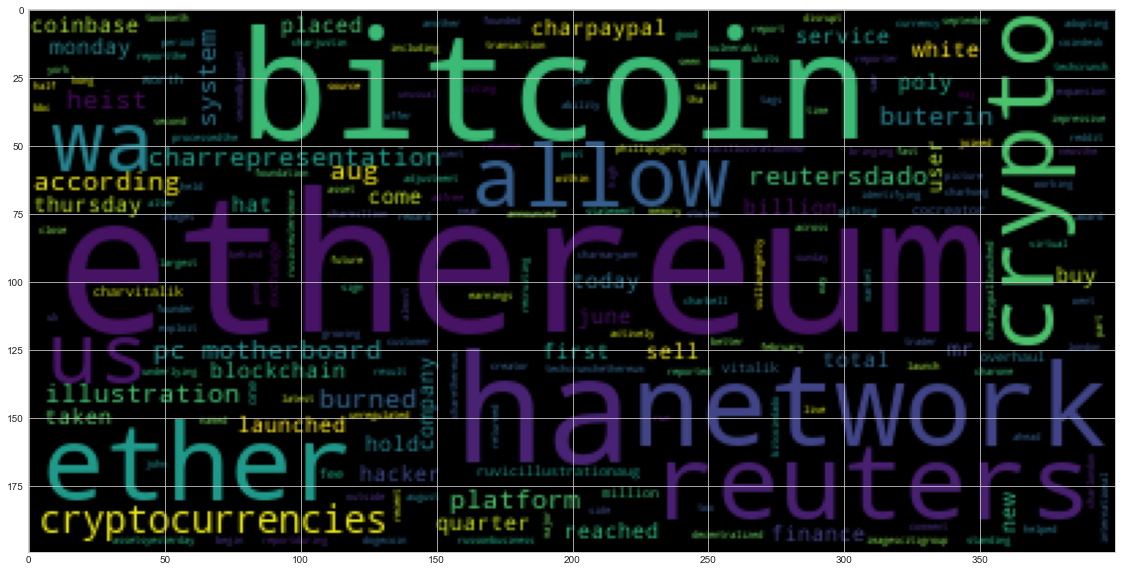

In [143]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(eth_df.tokens.str.cat())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [144]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [145]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [147]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = btc_df.tokens.str.cat()
btc_text

'wife started little garden urban backyard could think worm also bug dirt course filled worm bug composted corn cob charpaypal allow user outside us buy hold sell first time company announced today launch new service allow customer uk charphoto joe raedlegetty images twitter square ceo jack dorsey noted superfan bitcoin claimed monday eventually unite world yes reallyon mond charretailers increasingly accepting physical item knowyou spend crypto ephemeral experience like travel holder indicate willi charpaypal bringing ability buy hold sell cryptocurrencies across side pond better part year launched us statement company said tha charjoe tidycyber reporter taxi driver chris obsessively checking phone updatesim set lose almost euro worth coin sayschris describes hi charjoe tidycyber reporter follow generation mantra investigator looking criminalsin cyberrealm battle criminal authority ha chartmobile offer two year free identity theft protection service hacker stole data roughly million c

In [148]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data['title']= 'Bitcoin Named Entity Recognition (NER) visualization'

In [149]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [150]:
# List all Entities
# YOUR CODE HERE!
btc_entities = [(ent.text, ent.label_) for ent in btc_ner.ents] 
btc_entities

[('first', 'ORDINAL'),
 ('today', 'DATE'),
 ('monday', 'DATE'),
 ('two year', 'DATE'),
 ('roughly million', 'CARDINAL'),
 ('today', 'DATE'),
 ('second quarter', 'DATE'),
 ('quarter', 'DATE'),
 ('billion', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('four', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('billion', 'CARDINAL'),
 ('friday', 'DATE'),
 ('roughly million', 'CARDINAL'),
 ('surged past monday first', 'DATE'),
 ('tuesday', 'DATE')]

---

### Ethereum NER

In [151]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = eth_df.tokens.str.cat()
eth_text

'cent wa founded adfree creator network allows user offer crypto reward good post comment like gifting award reddit ethereum charpaypal allow user outside us buy hold sell first time company announced today launch new service allow customer uk charbell today coinbase reported another period impressive result second quarter earnings reportduring quarter coinbases total revenue reached billion helped charpaypal bringing ability buy hold sell cryptocurrencies across side pond better part year launched us statement company said tha charrepresentation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationnew york aug reuters maj charone unusual heist recent memory ha come close monday poly network decentralized finance platform saw hacker named mr white hat exploit vulnerabi charhong kong aug reuters ether held near twomonth high thursday ahead major adjustment underlying ethereum blockchain would alter way transaction processedthe

In [152]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data['title']= 'Ethereum Named Entity Recognition (NER) visualization'

In [153]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent')

In [154]:
# List all Entities
# YOUR CODE HERE!
eth_entities = [(ent.text, ent.label_) for ent in eth_ner.ents] 
eth_entities

[('first', 'ORDINAL'),
 ('today', 'DATE'),
 ('today', 'DATE'),
 ('second quarter', 'DATE'),
 ('quarter', 'DATE'),
 ('billion', 'CARDINAL'),
 ('monday', 'DATE'),
 ('thursday', 'DATE'),
 ('two', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('almost half', 'CARDINAL'),
 ('september', 'DATE'),
 ('sunday', 'DATE'),
 ('million', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('billion', 'CARDINAL'),
 ('thursday', 'DATE')]

---